#TASK #1: PROBLEM STATEMENT AND PROJECT OVERVIEW

![alt text](https://drive.google.com/uc?id=1qOZKOEs_N-SbkO2vqlsxpXfHAqjZLw1p)

#TASK #2: IMPORT DATASETS AND LIBRARIES

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from copy import copy
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [9]:
# Read the stock data csv file, here's the list of the stocks considered:

# AAPL = Apple Stock
# BA = Boeing
# T = AT&T
# MGM = MGM Resorts International (Hotel Industry)
# AMZN = Amazon
# IBM = IBM
# TSLA = Tesla Motors
# GOOG = Google
# sp500 = US Stock Market (S&P 500 is a stock market index that measures the stock performance of 500 large companies listed on U.S. stock exchange)
# Check the list of S&P 500 companies here: https://en.wikipedia.org/wiki/List_of_S%26P_500_companies



In [10]:
df = pd.read_csv('stock.csv')

df.head()

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.13,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.35,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.25,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.73,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.80,194.449997,180.520004,26.760000,318.590851,1314.500000


In [11]:
df.shape

(2159, 10)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2159 non-null   object 
 1   AAPL    2159 non-null   float64
 2   BA      2159 non-null   float64
 3   T       2159 non-null   float64
 4   MGM     2159 non-null   float64
 5   AMZN    2159 non-null   float64
 6   IBM     2159 non-null   float64
 7   TSLA    2159 non-null   float64
 8   GOOG    2159 non-null   float64
 9   sp500   2159 non-null   float64
dtypes: float64(9), object(1)
memory usage: 168.8+ KB


In [35]:
df.describe()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
count,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000
mean,140.819823,189.942700,35.162899,23.105743,915.665665,161.853001,259.600815,783.712512,2218.749554
std,70.827601,103.678586,3.207490,6.963847,697.838905,25.561938,210.988003,334.448057,537.321727
min,55.790001,67.239998,26.770000,7.140000,175.929993,94.769997,22.790001,278.481171,1278.040039
25%,89.165714,124.015000,33.040001,18.545000,316.490005,142.769997,184.595001,527.214416,1847.984985
50%,116.599998,142.419998,34.930000,23.780001,676.010010,156.949997,231.960007,737.599976,2106.629883
75%,175.019997,297.044998,37.419998,28.430000,1593.645019,185.974998,307.350006,1079.744995,2705.810059
max,455.609985,440.619995,43.470001,38.029999,3225.000000,215.800003,1643.000000,1568.489990,3386.149902


In [14]:
# Sort the stock data by date

df1 = df.sort_values(by = 'Date')

df1


,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [15]:
# Print out the number of stocks

number = len(df.columns[1:])

print("The total number of stocks are: ", number)

The total number of stocks are:  9


In [37]:
# Print the name of stocks
n = 0
for i in df.columns[1:]:
  n += 1
  print(f"stock{n}", i)


stock1 AAPL
stock2 BA
stock3 T
stock4 MGM
stock5 AMZN
stock6 IBM
stock7 TSLA
stock8 GOOG
stock9 sp500


**MINI CHALLENGE #1:**
- **What is the average return of the S&P500?**
- **Which stock or index has the minimum dispertion from the mean in dollar value?**
- **What is the maximum price for AMZN stock over the specified time period?**

In [17]:
avg = df['sp500'].mean()

avg

print("The average return on S&P500 is: ", avg)

The average return on S&P500 is:  2218.7495540592868


In [18]:
df3 = df.drop('Date', axis= 1)

std1 = df3.std()

std1



AAPL      70.827601
BA       103.678586
T          3.207490
MGM        6.963847
AMZN     697.838905
IBM       25.561938
TSLA     210.988003
GOOG     334.448057
sp500    537.321727
dtype: float64

In [19]:
stock2 = min(df3.std())

print("The stock with minumum standard deviation is", stock2)

The stock with minumum standard deviation is 3.2074898522656103


In [20]:
max_AMZN = max(df['AMZN'])

max_AMZN

3225.0

# TASK #3: PERFORM EXPLORATORY DATA ANALYSIS AND VISUALIZATION

In [21]:
# Check if data contains any null values
df.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [22]:
# Getting dataframe info


In [40]:
# Define a function to plot the entire dataframe
# The function takes in a dataframe df as an input argument and does not return anything back!
# The function performs data visualization
# Pandas works great with matplotlib, you can simply plot data directly from a Pandas DataFrame using plot() method

def data_plot(data, fig_title):
    data.plot(x = 'Date', figsize = (12,7), linewidth = 3, title = fig_title)
    plt.grid()
    plt.show()


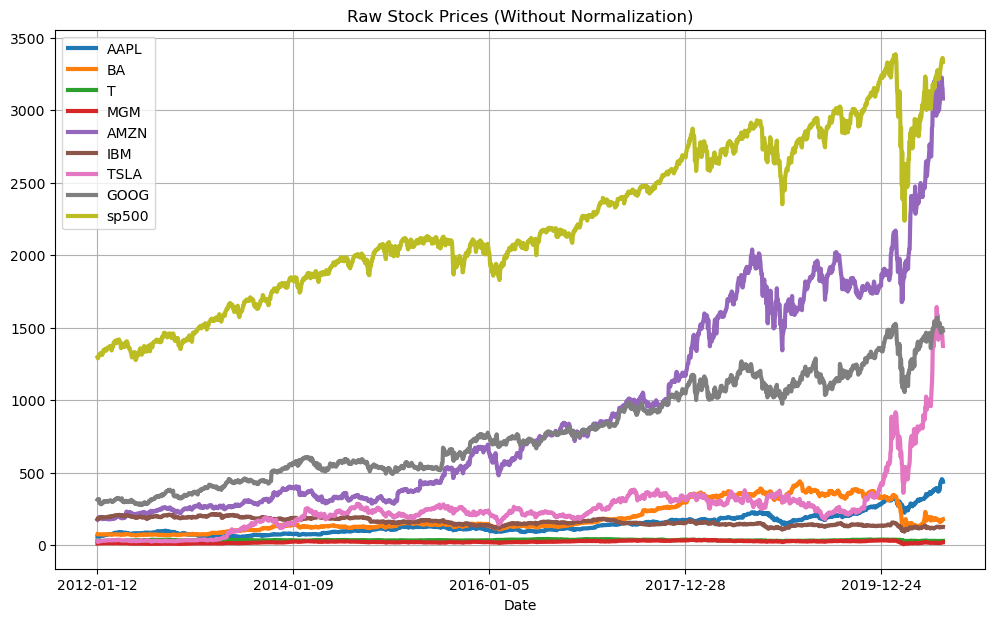

In [41]:
# Plot the data
data_plot( df, "Raw Stock Prices (Without Normalization)")


**MINI CHALLENGE #2:**
- **Print out normalized (scaled) stock prices**  


In [42]:
df3.head()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,60.198570,75.510002,30.120001,12.13,175.929993,180.550003,28.250000,313.644379,1295.500000
1,59.972858,74.599998,30.070000,12.35,178.419998,179.160004,22.790001,311.328064,1289.089966
2,60.671429,75.239998,30.250000,12.25,181.660004,180.000000,26.600000,313.116364,1293.670044
3,61.301430,75.059998,30.330000,12.73,189.440002,181.070007,26.809999,315.273285,1308.040039
4,61.107143,75.559998,30.420000,12.80,194.449997,180.520004,26.760000,318.590851,1314.500000


In [47]:
def normalize(df):
    x = df.copy()
    for i in x.columns[1:]:
        x[i] = x[i] / x[i][0]
    return x
        
        

In [48]:
normalize(df)

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2012-01-13,0.996251,0.987949,0.998340,1.018137,1.014153,0.992301,0.806726,0.992615,0.995052
2,2012-01-17,1.007855,0.996424,1.004316,1.009893,1.032570,0.996954,0.941593,0.998317,0.998587
3,2012-01-18,1.018320,0.994040,1.006972,1.049464,1.076792,1.002880,0.949027,1.005193,1.009680
4,2012-01-19,1.015093,1.000662,1.009960,1.055235,1.105269,0.999834,0.947257,1.015771,1.014666
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,7.313297,2.308039,0.991036,1.378401,18.217644,0.694821,52.567080,4.698347,2.568715
2155,2020-08-06,7.568452,2.280493,0.990704,1.521847,18.331155,0.698532,52.728494,4.782805,2.585226
2156,2020-08-07,7.383066,2.251622,0.996680,1.568838,18.004093,0.692107,51.423361,4.764919,2.586862
2157,2020-08-10,7.490377,2.375977,1.002656,1.784831,17.894390,0.704016,50.214865,4.770052,2.593956


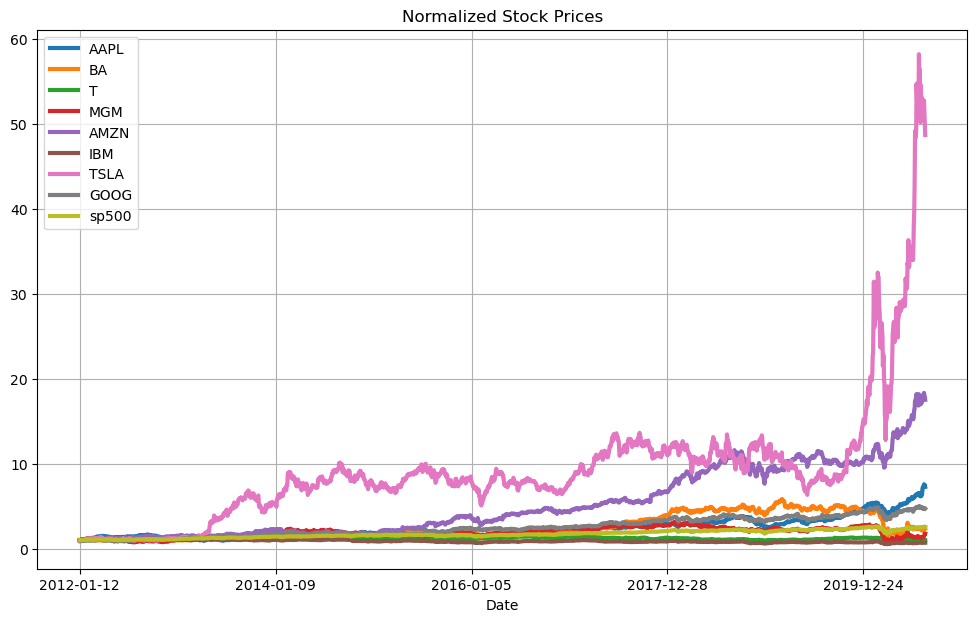

In [50]:
data_plot(normalize(df), "Normalized Stock Prices")

# TASK #4: PERFORM INTERACTIVE DATA VISUALIZATION

In [25]:
# Function to perform an interactive data plotting using plotly express
# Plotly.express module which is imported as px includes functions that can plot interactive plots easily and effectively.
# Every Plotly Express function uses graph objects internally and returns a plotly.graph_objects.Figure instance.

def interactive_plot(df, title):
    fig = px.line( title = title)
    for i in df.columns[1:]:
        
        




In [26]:
# Plot interactive chart


**MINI CHALLENGE #3:**
- **Plot normalized stock data in an interactive way**
- **It seems that most stocks experienced massive drops in 2020, let's assume that you own 100 shares of the S&P500 and you bought them on Feb 19th, 2020. How much did you lose (in $) by March 23rd, 2020?**


# TASK #5: CALCULATE INDIVIDUAL STOCKS DAILY RETURNS

In [27]:
# Let's calculate daily return for a single security
# Let's take the S&P500 as an example first


**MINI CHALLENGE #4:**
- **Calculate the daily return for Amazon stock.**


# TASK #6: CALCULATE MULTIPLE STOCKS DAILY RETURNS

In [28]:
# Let's define a function to calculate stocks daily returns (for all stocks)


In [29]:
# Get the daily returns


**MINI CHALLENGE #5:**
- **Plot the returns vs. time using both static and interactive plots**
- **What is the maximum daily return in % values**

# TASK #7: CALCULATE THE CORRELATIONS BETWEEN DAILY RETURNS

In [30]:
# Daily Return Correlation


**MINI CHALLENGE #6:**
- **What are the top 2 stocks that are positively correlated with the S&P500?**
- **What is the correlation between Amazon and Boeing? Comment on your answer**
- **What is the correlation between MGM and Boeing? Comment on your answer**

# TASK #8: PLOT THE HISTOGRAM FOR DAILY RETURNS

In [31]:
# Histogram of daily returns
# Stock returns are normally distributed with zero mean
# Notice how Tesla Standard deviation is high indicating a more volatile stock


**MINI CHALLENGE #7:**
- **Based on the histogram, which of the following stocks are more risky? T or TSLA**

In [32]:
# Group all data returns together in a list
# Make a copy of the daily returns dataframe


In [33]:
# Plotly's Python API contains a super pwerful module known as figure factory module
# Figure factory module includes wrapper functions that create unique chart types such as interactive subplots
# Check this out for more information: https://plotly.com/python/figure-factory-subplots/
# Notice how Boeing, Tesla and MGM gains are losses are sometimes extreme! This will indicate a more risky investment and will be quantified later using Sharpe Ratio


# EXCELLENT JOB!

# **MINI CHALLENGE SOLUTIONS**

**MINI CHALLENGE #1 SOLUTION:**
- **What is the average return of the S&P500?**
- **What is the maximum price for AMZN stock over the specified time period?**

In [34]:
# Get the mean values
stocks_df.mean()

NameError: name 'stocks_df' is not defined

In [ ]:
# Get the standard deviation of stocks (Volatility)
stocks_df.std()

In [ ]:
# Statistical data of the dataframe
stocks_df.describe()

**MINI CHALLENGE #2 SOLUTION:**
- **Print out normalized (scaled) stock prices**  


In [ ]:
# Function to normalize the prices based on the initial price
# The function simply divides every stock by it's price at the start date (i.e.: Date = 2012-01-12)
def normalize(df):
  x = df.copy()

  # Loop through each stock (while ignoring time columns with index 0)
  for i in x.columns[1:]:
    x[i] = x[i]/x[i][0]
  return x

In [ ]:
# Plot normalized data
# Notice the massive gains in Tesla Stock compared to Amazon (second place)
show_plot(normalize(stocks_df), 'NORMALIZED STOCK PRICES')

**MINI CHALLENGE #3 SOLUTION:**
- **Plot normalized stock data in an interactive way**
- **It seems that most stocks experienced massive drops in 2020, let's assume that you own 100 shares of the S&P500 and you bought them on Feb 19th, 2020. How much did you lose (in $) by March 23rd, 2020?**


In [ ]:
# Plot normalized interactive chart
interactive_plot(normalize(stocks_df), 'Normalized Prices')


In [ ]:
# S&P500 dropped from $3386.15 on Feb 19th, 2020 to $2237.4 by March 23rd, 2020
# Net loss = $3386.15 - $2237.4 = $1148.75

**MINI CHALLENGE #4 SOLUTION:**
- **Calculate the daily return for Amazon stock.**


In [ ]:
df = stocks_df['AMZN']

**MINI CHALLENGE #5 SOLUTION:**
- **Plot the returns vs. time using both static and interactive plots**
- **What is the maximum daily return in % values**

In [ ]:
# Plot the daily returns
# Notice huge drops in MGM around March 2020 (Pandemic effect)
show_plot(stocks_daily_return, 'STOCKS DAILY RETURNS')

In [ ]:
# Plot the interactive chart
# Zoom in to view the sharp decline during March 2020
interactive_plot(stocks_daily_return, 'STOCKS DAILY RETURNS')

**MINI CHALLENGE #6 SOLUTION:**
- **What are the top 2 stocks that are positively correlated with the S&P500?**
- **What is the correlation between Amazon and Boeing? Comment on your answer**
- **What is the correlation between MGM and Boeing? Comment on your answer**

In [ ]:
# Strong positive correlation between S&P500 and Google
# Strong positive correlation between S&P500 and IBM
# Almost no correlation between Amazon and Beoing - totally different sectors
# Some correlation exists between MGM and Boeing (Hotel and Airlines)

**MINI CHALLENGE #7 SOLUTION:**
- **Based on the histogram, which of the following stocks are more risky? T or TSLA**

In [ ]:
# Tesla standard deviation is much larger compared to T indicating a more risky security